# Vector Auto Regression - VAR

In [1]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [2]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests,adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
# import csv dataset
df=pd.read_csv('divvy-tripdata_cleaned.csv',index_col=1,parse_dates=True)

# make into dataframe
df2=pd.DataFrame(df)

# which columns to include alongside column acting as index
cols=[3,4,6,10,11,12,14,15]
df2=df2[df2.columns[cols]]

# sorting the dataframe
df3=df2.sort_values("start_time")
df3.head()

trip_duration  from_station_id  to_station_id  \
start_time                                                           
2013-06-30 11:04:00           1538               69             88   
2013-06-30 11:35:00           1108               76             26   
2013-06-30 11:55:00           2063               53             94   
2013-06-30 12:03:00            775               36             52   
2013-06-30 12:15:00            784               90              5   

                     birth_year  from_latitude  from_longitude  to_latitude  \
start_time                                                                    
2013-06-30 11:04:00         NaN      41.909396      -87.677692    41.883970   
2013-06-30 11:35:00         NaN      41.880958      -87.616743    41.891020   
2013-06-30 11:55:00         NaN      41.893832      -87.634195    41.918306   
2013-06-30 12:03:00         NaN      41.877708      -87.635321    41.886024   
2013-06-30 12:15:00         NaN      41.881032      -87.624084    41.874053   

                     to_longitude  
start_time                         
2013-06-30 11:04:00    -87.655688  
2013-06-30 11:35:00    -87.617300  
2013-06-30 11:55:00    -87.636282  
2013-06-30 12:03:00    -87.624117  
2013-06-30 12:15:00    -87.627716

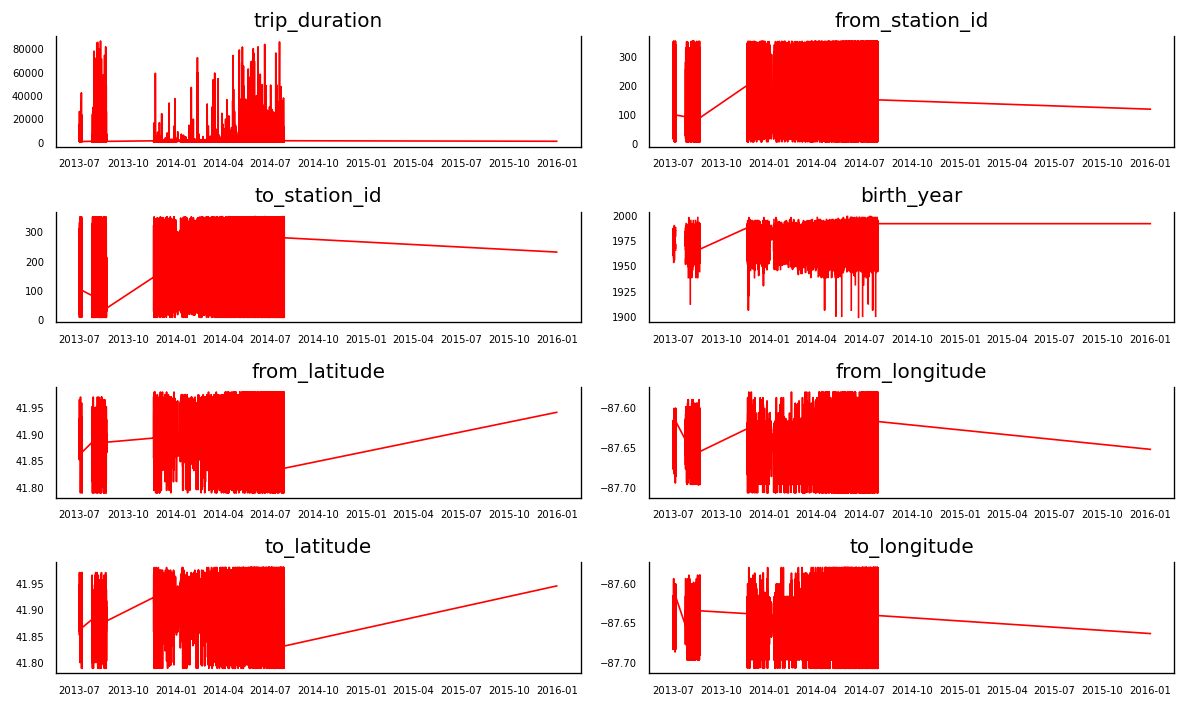

In [4]:
fig,axes=plt.subplots(nrows=4,ncols=2,dpi=120,figsize=(10,6))
for i,ax in enumerate(axes.flatten()):
    data=df3[df3.columns[i]]
    ax.plot(data,color='red',linewidth=1)
    # decorations
    ax.set_title(df3.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    
plt.tight_layout()

In [5]:
ad_fuller_result_1=adfuller(df3['trip_duration'])

print('trip duration')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n-------------------\n')

ad_fuller_result_2=adfuller(df3['from_station_id'])

print('from station id')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n-------------------\n')

ad_fuller_result_3=adfuller(df3['to_station_id'])

print('to station id')
print(f'ADF Statistic: {ad_fuller_result_3[0]}')
print(f'p-value: {ad_fuller_result_3[1]}')

print('\n-------------------\n')

ad_fuller_result_4=adfuller(df3['from_latitude'])

print('from latitude')
print(f'ADF Statistic: {ad_fuller_result_4[0]}')
print(f'p-value: {ad_fuller_result_4[1]}')

print('\n-------------------\n')

ad_fuller_result_5=adfuller(df3['from_longitude'])

print('from longitude')
print(f'ADF Statistic: {ad_fuller_result_5[0]}')
print(f'p-value: {ad_fuller_result_5[1]}')

print('\n-------------------\n')

ad_fuller_result_6=adfuller(df3['to_latitude'])

print('to latitude')
print(f'ADF Statistic: {ad_fuller_result_6[0]}')
print(f'p-value: {ad_fuller_result_6[1]}')

print('\n-------------------\n')

ad_fuller_result_7=adfuller(df3['to_longitude'])

print('to longitude')
print(f'ADF Statistic: {ad_fuller_result_7[0]}')
print(f'p-value: {ad_fuller_result_7[1]}')

trip duration
ADF Statistic: -22.42879852119242
p-value: 0.0

-------------------

from station id
ADF Statistic: -17.12669891596911
p-value: 7.195473553588861e-30

-------------------

to station id
ADF Statistic: -17.237989651219483
p-value: 6.132886757974755e-30

-------------------

from latitude
ADF Statistic: -22.558062833641646
p-value: 0.0

-------------------

from longitude
ADF Statistic: -24.52111519052165
p-value: 0.0

-------------------

to latitude
ADF Statistic: -23.836575021686667
p-value: 0.0

-------------------

to longitude
ADF Statistic: -26.000107219086264
p-value: 0.0


In [6]:
# if the p-value is greater than 0.05, then the data corresponding to that
# particular column is not stationary
# in that case, we need to convert the non-stationary data to stationary data
# by differentiating suitable number of times until we get stationary data

In [6]:
# does from station id cause trip duration
print('from station id cause trip duration?\n')
print('-------------------')
granger_1=grangercausalitytests(df3[['trip_duration','from_station_id']],4)

# does to station id cause trip duration
print('to station id cause trip duration?\n')
print('-------------------')
granger_2=grangercausalitytests(df3[['trip_duration','to_station_id']],4)

from station id cause trip duration?

-------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8872  , p=0.0487  , df_denom=75996, df_num=1
ssr based chi2 test:   chi2=3.8874  , p=0.0487  , df=1
likelihood ratio test: chi2=3.8873  , p=0.0487  , df=1
parameter F test:         F=3.8872  , p=0.0487  , df_denom=75996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6184  , p=0.0268  , df_denom=75993, df_num=2
ssr based chi2 test:   chi2=7.2373  , p=0.0268  , df=2
likelihood ratio test: chi2=7.2370  , p=0.0268  , df=2
parameter F test:         F=3.6184  , p=0.0268  , df_denom=75993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.3910  , p=0.0003  , df_denom=75990, df_num=3
ssr based chi2 test:   chi2=19.1746 , p=0.0003  , df=3
likelihood ratio test: chi2=19.1722 , p=0.0003  , df=3
parameter F test:         F=6.3910  , p=0.0003  , df_denom=75990, df_num=3

Granger Causality
numbe

In [8]:
# if p-value is less than 0.05, then that means the hypothesis is true
# we can conclude that: from station id causes trip duration
# we can conclude that: to station id causes trip duration

In [7]:
df4=df3[['trip_duration','from_station_id','to_station_id','from_latitude','from_longitude','to_latitude','to_longitude']]
print(df4.shape)

(76000, 7)


In [8]:
train_df=df4[:-7600]
test_df=df4[-7600:]

In [9]:
print(test_df.shape)

(7600, 7)


In [10]:
model=VAR(train_df.diff()[1:])

In [11]:
sorted_order=model.select_order(maxlags=100)
print(sorted_order.summary())

  VAR Order Selection (* highlights the minimums)  
        AIC         BIC         FPE         HQIC   
---------------------------------------------------
0         6.254       6.255       520.2       6.254
1         4.272       4.280       71.69       4.275
2         3.456       3.470       31.70       3.461
3         3.008       3.028       20.24       3.014
4         2.740       2.767       15.49       2.749
5         2.551       2.585       12.82       2.562
6         2.413       2.453       11.16       2.425
7         2.301       2.347       9.981       2.315
8         2.219       2.272       9.196       2.235
9         2.151       2.210       8.590       2.169
10        2.093       2.159       8.106       2.113
11        2.045       2.118       7.726       2.067
12        2.004       2.083       7.418       2.028
13        1.972       2.058       7.183       1.998
14        1.941       2.034       6.969       1.970
15        1.915       2.015       6.789       1.946
16        1.

In [14]:
# gives some scores like AIC, BIC, FPE, HQIC scores
# for a model to be good, these scores must be as low as possible
# for each of the scores, the min lag values found are highlighted by *

In [12]:
var_model=VARMAX(train_df,order=(1,0),enforce_stationarity=False)

In [13]:
fitted_model=var_model.fit(disp=False)

In [14]:
print(fitted_model.summary())

                                                                              Statespace Model Results                                                                             
Dep. Variable:     ['trip_duration', 'from_station_id', 'to_station_id', 'from_latitude', 'from_longitude', 'to_latitude', 'to_longitude']   No. Observations:                68400
Model:                                                                                                                              VAR(1)   Log Likelihood             -736824.853
                                                                                                                               + intercept   AIC                        1473817.706
Date:                                                                                                                     Fri, 09 Dec 2022   BIC                        1474584.888
Time:                                                                                               

In [ ]:
# the advantage of using the VARMAX class is that
# it makes forecasting very easy
# we are using only the auto regression part 
# and not using the moving average part
# hence the moving average part is assigned 0
# whereas the auto regression part is set to 4 time lags

In [23]:
n_forecast = 7600
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)

predictions=predict.predicted_mean

In [24]:
predictions.columns=['trip_duration_predicted','from_station_id_predicted','to_station_id_predicted','from_latitude_predicted','from_longitude_predicted','to_latitude_predicted','to_longitude_predicted']
predictions

trip_duration_predicted  from_station_id_predicted  \
68400              1110.276974                 161.855309   
68401              1127.661399                 153.851605   
68402              1130.889464                 152.902767   
68403              1131.366820                 152.801495   
68404              1131.425474                 152.790927   
...                        ...                        ...   
75995              1131.432865                 152.789708   
75996              1131.432865                 152.789708   
75997              1131.432865                 152.789708   
75998              1131.432865                 152.789708   
75999              1131.432865                 152.789708   

       to_station_id_predicted  from_latitude_predicted  \
68400               165.978097                41.900510   
68401               153.819971                41.898575   
68402               152.690756                41.898384   
68403               152.579609                41.898365   
68404               152.568452                41.898363   
...                        ...                      ...   
75995               152.567193                41.898363   
75996               152.567193                41.898363   
75997               152.567193                41.898363   
75998               152.567193                41.898363   
75999               152.567193                41.898363   

       from_longitude_predicted  to_latitude_predicted  to_longitude_predicted  
68400                -87.640234              41.901794              -87.641532  
68401                -87.640270              41.899146              -87.640482  
68402                -87.640227              41.898911              -87.640369  
68403                -87.640220              41.898890              -87.640358  
68404                -87.640219              41.898888              -87.640357  
...                         ...                    ...                     ...  
75995                -87.640219              41.898887              -87.640357  
75996                -87.640219              41.898887              -87.640357  
75997                -87.640219              41.898887              -87.640357  
75998                -87.640219              41.898887              -87.640357  
75999                -87.640219              41.898887              -87.640357  

[7600 rows x 7 columns]

In [25]:
test_df

trip_duration  from_station_id  to_station_id  \
start_time                                                           
2014-07-17 17:13:00           1288               33             19   
2014-07-17 17:13:00           1557              192             54   
2014-07-17 17:13:00            949              337            195   
2014-07-17 17:13:00           1210               35             34   
2014-07-17 17:14:00            650               37            110   
...                            ...              ...            ...   
2014-07-27 19:17:00            183              157            300   
2014-07-27 19:18:00            421              173             24   
2014-07-27 19:18:00           1150              334            295   
2014-07-27 19:19:00            951              149            278   
2015-12-31 17:35:00            521              117            229   

                     from_latitude  from_longitude  to_latitude  to_longitude  
start_time                                                                     
2014-07-17 17:13:00      41.877181      -87.627844    41.869417    -87.660996  
2014-07-17 17:13:00      41.879255      -87.639904    41.896362    -87.654061  
2014-07-17 17:13:00      41.896544      -87.630931    41.884728    -87.619521  
2014-07-17 17:13:00      41.891071      -87.612200    41.926756    -87.634429  
2014-07-17 17:14:00      41.879356      -87.629791    41.893992    -87.629318  
...                            ...             ...          ...           ...  
2014-07-27 19:17:00      41.936669      -87.636794    41.937725    -87.644095  
2014-07-27 19:18:00      41.896910      -87.621743    41.891860    -87.620620  
2014-07-27 19:18:00      41.940775      -87.639192    41.972972    -87.659637  
2014-07-27 19:19:00      41.834900      -87.617930    41.830629    -87.641290  
2015-12-31 17:35:00      41.940180      -87.653040    41.943739    -87.664020  

[7600 rows x 7 columns]

In [26]:
print(predictions.shape)

(7600, 7)


In [27]:
print(test_df.shape)

(7600, 7)


In [1]:
test_vs_pred=pd.concat([test_df,predictions],ignore_index=True,axis=1)

In [ ]:
test_vs_pred.plot(figsize=(12,5))

In [29]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_trip_duration=math.sqrt(mean_squared_error(predictions['trip_duration_predicted'],test_df['trip_duration']))
print('Mean value of trip duration is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['trip_duration']),rmse_trip_duration))

rmse_from_station_id=math.sqrt(mean_squared_error(predictions['from_station_id_predicted'],test_df['from_station_id']))
print('Mean value of from station id is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['from_station_id']),rmse_from_station_id))

rmse_to_station_id=math.sqrt(mean_squared_error(predictions['to_station_id_predicted'],test_df['to_station_id']))
print('Mean value of to station id is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['to_station_id']),rmse_to_station_id))

rmse_from_latitude=math.sqrt(mean_squared_error(predictions['from_latitude_predicted'],test_df['from_latitude']))
print('Mean value of from latitude is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['from_latitude']),rmse_from_latitude))

rmse_from_longitude=math.sqrt(mean_squared_error(predictions['from_longitude_predicted'],test_df['from_longitude']))
print('Mean value of from longitude is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['from_longitude']),rmse_from_longitude))

rmse_to_latitude=math.sqrt(mean_squared_error(predictions['to_latitude_predicted'],test_df['to_latitude']))
print('Mean value of to latitude is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['to_latitude']),rmse_to_latitude))

rmse_to_longitude=math.sqrt(mean_squared_error(predictions['to_longitude_predicted'],test_df['to_longitude']))
print('Mean value of to longitude is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['to_longitude']),rmse_to_longitude))

Mean value of trip duration is : 1178.8843421052632. Root Mean Squared Error is :1931.664704552034
Mean value of from station id is : 165.5586842105263. Root Mean Squared Error is :101.44341477411363
Mean value of to station id is : 163.86394736842107. Root Mean Squared Error is :101.46618404422294
Mean value of from latitude is : 41.9011018375975. Root Mean Squared Error is :0.031078594416012194
Mean value of from longitude is : -87.64010518736316. Root Mean Squared Error is :0.019752273884731962
Mean value of to latitude is : 41.90193249784579. Root Mean Squared Error is :0.03128342861828945
Mean value of to longitude is : -87.64028135729079. Root Mean Squared Error is :0.020013969429659724
